# Linear Regression Project




In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#!pip install statsmodels
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures

### Step 1

In [86]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)

In [87]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
886,57,male,28.975,0,yes,northeast,27218.43725
1160,43,female,34.580,1,no,northwest,7727.25320
947,37,male,34.200,1,yes,northeast,39047.28500
617,49,male,25.600,2,yes,southwest,23306.54700
930,26,male,46.530,1,no,southeast,2927.06470
792,22,female,23.180,0,no,northeast,2731.91220
1082,38,male,19.950,1,no,northwest,5855.90250
648,18,male,28.500,0,no,northeast,1712.22700
1234,45,female,27.830,2,no,southeast,8515.75870
333,56,female,28.785,0,no,northeast,11658.37915


### Step 2

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [89]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [90]:
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Verificar duplicados

In [91]:
df.duplicated().any()

True

In [92]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


En este caso nos podríamos quedar con los duplicados dado que pueden ser personas distintas

Correlation matrix

<AxesSubplot:>

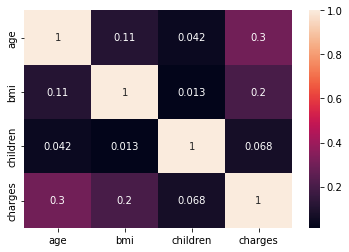

In [93]:
sns.heatmap(df.corr(), annot= True)

In [94]:
#Pasar variables categoricas 

df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)

#Categoria de referencias sexo femenino, no fumador y región noreste (categorías que no se incluyen)

### Step 3


In [95]:
x = df.drop("charges", axis=1)
y = df.charges

In [96]:
# Separar train y test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 15)

In [97]:
model = LinearRegression() #cargar modelo

#Entrenar

model.fit(x_train, y_train)

print( "Intercept: ", model.intercept_ )
print("Variables: ", x_train.columns)
print( "Coeficientes: ", model.coef_ ) #Coeficientes para cada una de las variables


Intercept:  -11812.952212787559
Variables:  Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
Coeficientes:  [  259.28377294   334.33013348   560.38480047  -216.92164981
 24043.57115706  -210.36710762 -1159.01410243  -989.16702841]


In [98]:
x_interceptor = sm.add_constant(x_train)
model2 = sm.OLS(y_train, x_interceptor)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     351.2
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.85e-283
Time:                        23:41:07   Log-Likelihood:                -10183.
No. Observations:                1003   AIC:                         2.038e+04
Df Residuals:                     994   BIC:                         2.043e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.181e+04   1164.810    -10.142      0.000   -1.41e+04   -9527.184
age                259.2838     14.094     18.396      0.000     231.626     286.942
bmi                334.3301     33.696      9.922      0.000     268.206     400.454
children           560.3848    161.831      3.463      0.001     242.816     877.954
sex_male          -216.9216    397.204     -0.546      0.585    -996.376     562.532
smoker_yes        2.404e+04    499.031     48.181      0.000    2.31e+04     2.5e+04
region_northwest  -210.3671    567.856     -0.370      0.711   -1324.700     903.966
region_southeast -1159.0141    572.395     -2.025      0.043   -2282.255     -35.773
region_southwest  -989.1670    558.264     -1.772      0.077   -2084.678     106.343
==============================================================================
Omnibus:                      231.741   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.491
Skew:                           1.239   Prob(JB):                    3.53e-119
Kurtosis:                       5.629   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
#Predicciones

y_pred = model.predict(x_test)


In [100]:
#Metricas 

print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  4023.6471495940405
Mean Squared Error:  30723136.826880053
Root Mean Squared Error:  5542.845553222645


### Step 4

In [101]:
#Sacarle el intercept
#Modelo sin constante

model3 = LinearRegression(fit_intercept=False) #cargar modelo

#Entrenar

model3.fit(x_train, y_train)


LinearRegression(fit_intercept=False)

In [104]:
#Predicciones

y_pred = model3.predict(x_test)

In [106]:
#Metricas 
print("Modelo sin constante")
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Modelo sin constante
Mean Absolute Error:  4278.042622074816
Mean Squared Error:  34870064.92980866
Root Mean Squared Error:  5905.088054365376


In [110]:
#Modelo con polinomio de segundo grado
 
poly_features = PolynomialFeatures(degree = 2) #Parábola

#Transforma variables a polinomicas

x_poly_train = poly_features.fit_transform(x_train) 
x_poly_test = poly_features.fit_transform(x_test)

modelo4 = model.fit(x_poly_train, y_train)

In [111]:
y_pred = modelo4.predict(x_poly_test)

In [112]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  3794.6198658238804
Mean Squared Error:  27793221.25291654
Root Mean Squared Error:  5271.927660061027
